In [51]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [52]:
import numpy as np
from chainconsumer import ChainConsumer

In [53]:
! ls -l *chain*.npy

-rw-r--r-- 1 swmclau2 des 10106508 Jul 20 09:41 2000w_10000s_sham_chain.npy
-rw-r--r-- 1 swmclau2 des   948233 Jul 20 00:04 ab_sham_chain_alt_model.npy
-rw-r--r-- 1 swmclau2 des  4736147 Jul 20 07:21 sham_chain_alt_model.npy


In [54]:
#fnames = ['sham_chain_hsab.npy', 'ab_sham_chain_hsab.npy']
#fnames = ['sham_chain_noab.npy', 'ab_sham_chain_noab.npy']
#fnames = ['sham_chain_hsab_abo.npy', 'ab_sham_chain_hsab_abo.npy']
#fnames = ['sham_chain_abo.npy', 'ab_sham_chain_abo.npy']

fnames = ['old_chains/ab_sham_chain_abo.npy','old_chains/ab_sham_chain_hsab_abo.npy']
#fnames = ['old_chains/sham_chain_abo.npy','old_chains/sham_chain_hsab_abo.npy']

#fnames = ['sham_chain_noab.npy', 'sham_chain_hsab.npy']
#fnames = ['ab_sham_chain_noab.npy', 'ab_sham_chain_hsab.npy']

#fnames = ['sham_chain_noab.npy', 'sham_chain_noab_model2.npy']
#fnames = ['ab_sham_chain.npy', 'sham_chain.npy']

In [55]:
#names = [r"$V_{vir}$", r"$V_{peak}$"]
names = [r"Continuous", r"Heaviside"]
#names = [r"Baseline", r"Heaviside"]
#names = [r"Zheng07", r"Reddick+Zheng"]

In [56]:
all_param_names = [r'$\log{M_{min}}$', r'$\mathcal{A}_{cen}$', r'$\log{M_0}$','$\log{M_1}$',r'$\mathcal{B}_{sat}$',\
               r'$\mathcal{A}_{sat}$',r'$\mathcal{B}_{cen}$', r'$\sigma_{log{M}}$', r'$\alpha$']
ab_param_names = [ r'$\mathcal{A}_{cen}$', r'$\mathcal{A}_{sat}$']

hod_param_names = [r'$\log{M_{min}}$', r'$\log{M_0}$','$\log{M_1}$', r'$\sigma_{log{M}}$', r'$\alpha$']
cab_param_names = [ r'$\mathcal{A}_{cen}$', r'$\mathcal{A}_{sat}$',r'$\mathcal{B}_{cen}$', r'$\mathcal{B}_{sat}$' ]

In [57]:
param_name_list = [cab_param_names, ab_param_names]

In [58]:
c = ChainConsumer()

In [59]:
def load_chain(fname):
    vals = []
    with open(fname) as f:
        params = f.readline()[1:]
        split_params = params.strip().strip('[]').split(',')
        params = []
        for p in split_params:
            params.append(p.strip().strip("'"))
        linestr = ''
        linevals = np.zeros((len(params)))
        i = 0
        for line in f:
            linestr+=line.replace('\n', ' ')
            if linestr[-2] == ']': #we have a full actual line now
                splitline = linestr.strip().strip('[]').split(' ')
                idx = 0
                for sl in splitline:
                    if sl != '' and sl != ' ':
                        linevals[idx] = float(sl)
                        idx+=1
                vals.append(linevals)
                linestr = ''
                linevals = np.zeros((len(params)))
        return np.array(vals)

In [60]:
for fname, name, p_names in zip(fnames,names, param_name_list):
    try:
        chain = np.genfromtxt(fname)
    except ValueError:
        chain = load_chain(fname)
    print chain.shape
    print p_names
    c.add_chain(chain, parameters=p_names, name = name)

(8000, 4)
['$\\mathcal{A}_{cen}$', '$\\mathcal{A}_{sat}$', '$\\mathcal{B}_{cen}$', '$\\mathcal{B}_{sat}$']
(8000, 2)
['$\\mathcal{A}_{cen}$', '$\\mathcal{A}_{sat}$']


In [61]:
#c.configure(statistics='mean')

In [62]:
hod_true_vals = np.array([12.9390382,12.51024343,  14.36144524,   0.73766725,  1.06822384])
all_true_vals = np.array([12.9390382,0.0, 12.51024343,  14.36144524, 0.0,  0.73766725,  1.06822384])

In [63]:
from pearce.mocks import AssembiasRedMagicCens, AssembiasRedMagicSats
cens_model = AssembiasRedMagicCens()
sats_model = AssembiasRedMagicSats(cens_model)
param_dict = sats_model.param_dict
del param_dict['f_c']
params = param_dict.keys()
initial_vals = np.array([param_dict[key] for key in params])

In [64]:
initial_vals

array([ 12.1 ,   0.5 ,  12.2 ,  13.7 ,   1.  ,   0.5 ,   1.  ,   0.46,
         1.02])

In [65]:
initial_hod_vals =[12.1, 12.2, 13.7, 0.46, 1.02]
initial_ab_vals =[0.5, 0.5, 1.0, 1.0]

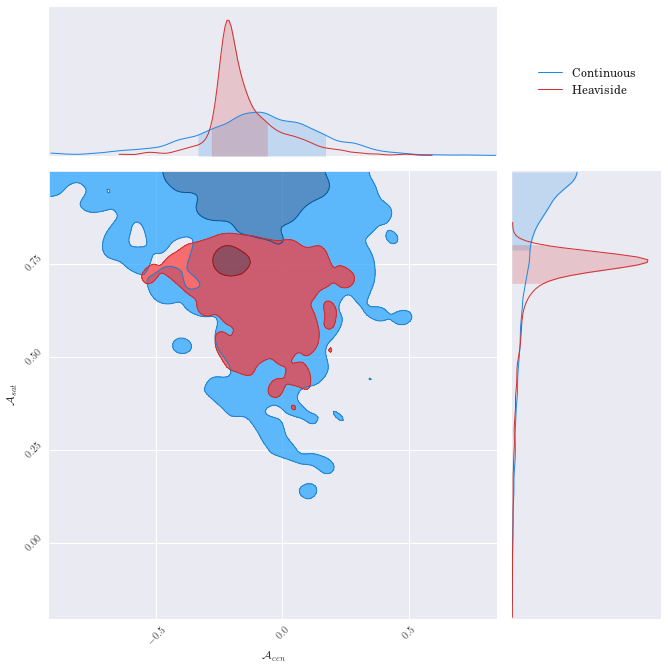

In [66]:
fig = c.plotter.plot(figsize='PAGE', parameters = ab_param_names, truth=initial_hod_vals) 
fig.show()

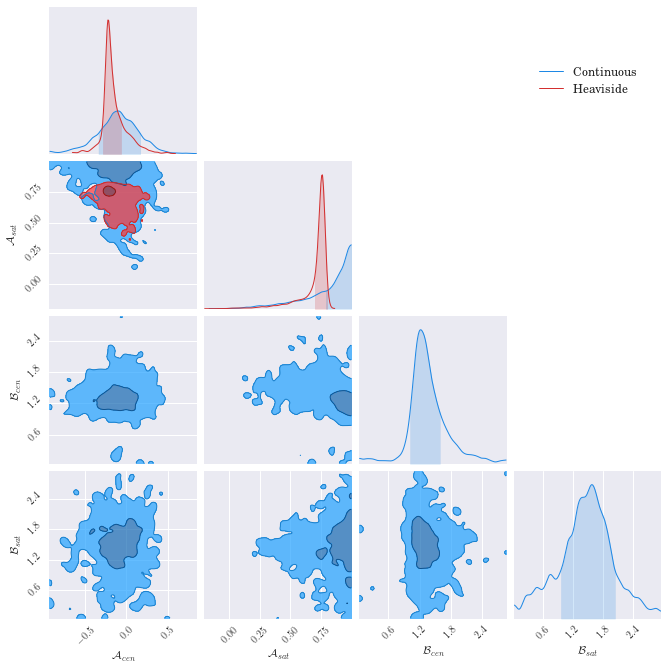

In [67]:
fig = c.plotter.plot(figsize='PAGE', parameters = cab_param_names)#, truth=initial_ab_vals)
fig.show()

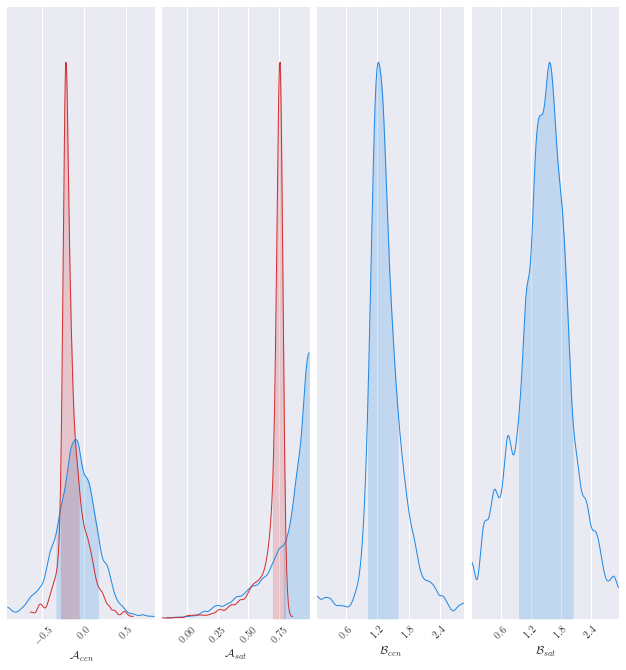

In [68]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10,10) )
fig.show()

In [69]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

TypeError: unsupported operand type(s) for %: 'int' and 'NoneType'